# Eksploracja danych

Przydatny link:
https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

Definicja ścieżek:

In [27]:
iteration_path = "iteration_3/"
deliveries_path = "../data/" + iteration_path + "raw/deliveries.jsonl"
products_path = "../data/" + iteration_path + "raw/products.jsonl"
sessions_path = "../data/" + iteration_path + "raw/sessions.jsonl"
users_path = "../data/" + iteration_path + "raw/users.jsonl"

In [38]:
deliveries_data = pd.read_json(deliveries_path, lines=True)
products_data = pd.read_json(products_path, lines=True)
sessions_data = pd.read_json(sessions_path, lines=True)
users_data = pd.read_json(users_path, lines=True)

# Dane sesji:

In [46]:
sessions_data
sessions_data['timestamp_date'] = sessions_data['timestamp'].apply(lambda x: x.date())
# sessions_data['timestamp_week'] = sessions_data['timestamp'].apply(lambda x: x.week)
# sessions_data['timestamp_month'] = sessions_data['timestamp'].apply(lambda x: x.month)
# sessions_data['timestamp_quarter'] = sessions_data['timestamp'].apply(lambda x: x.quarter)

In [82]:
sessions_data.dtypes

session_id                   int64
timestamp           datetime64[ns]
user_id                      int64
product_id                   int64
event_type                  object
offered_discount             int64
purchase_id                float64
timestamp_date              object
dtype: object

In [83]:
pd.isna(sessions_data).sum()

session_id              0
timestamp               0
user_id                 0
product_id              0
event_type              0
offered_discount        0
purchase_id         20961
timestamp_date          0
dtype: int64

In [76]:
sessions_data['event_type'].value_counts()

VIEW_PRODUCT    20961
BUY_PRODUCT      3613
Name: event_type, dtype: int64

In [47]:
sessions_data.sort_values(by=['timestamp'])

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id,timestamp_date
5462,1615,2021-01-08 17:29:37,139,1032,VIEW_PRODUCT,10,NaN,2021-01-08
5463,1615,2021-01-08 17:32:51,139,1033,VIEW_PRODUCT,10,NaN,2021-01-08
5464,1615,2021-01-08 17:35:32,139,1033,BUY_PRODUCT,10,20833.0,2021-01-08
5544,1635,2021-01-10 05:56:20,139,1292,VIEW_PRODUCT,20,NaN,2021-01-10
5545,1635,2021-01-10 05:57:54,139,1291,VIEW_PRODUCT,20,NaN,2021-01-10
...,...,...,...,...,...,...,...,...
12596,3603,2021-12-10 11:21:21,200,1041,VIEW_PRODUCT,20,NaN,2021-12-10
12597,3603,2021-12-10 11:23:13,200,1047,VIEW_PRODUCT,20,NaN,2021-12-10
12598,3603,2021-12-10 11:26:10,200,1040,VIEW_PRODUCT,20,NaN,2021-12-10
12599,3603,2021-12-10 11:26:46,200,1040,BUY_PRODUCT,20,21867.0,2021-12-10


Ilość zdarzeń w sesji na dzień - wykres

In [48]:
len(sessions_data['timestamp_date'].value_counts())

335

<AxesSubplot:>

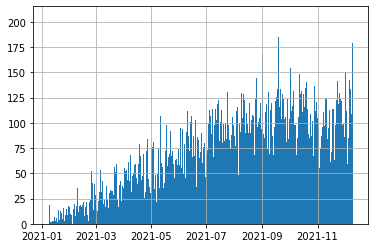

In [49]:
sessions_data['timestamp_date'].hist(bins=len(sessions_data['timestamp_date'].value_counts()))

# Dane produktów

In [36]:
products_data

,product_id,product_name,category_path,price
0,1001,Telefon Siemens Gigaset DA310,Telefony i akcesoria;Telefony stacjonarne,58.97
1,1002,Kyocera FS-1135MFP,Komputery;Drukarki i skanery;Biurowe urządzeni...,2048.50
2,1003,Kyocera FS-3640MFP,Komputery;Drukarki i skanery;Biurowe urządzeni...,7639.00
3,1004,Fallout 3 (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,49.99
4,1005,Szalone Króliki Na żywo i w kolorze (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,49.99
...,...,...,...,...
314,1315,Jabra Talk,Telefony i akcesoria;Akcesoria telefoniczne;Ze...,54.99
315,1316,Plantronics Voyager Legend,Telefony i akcesoria;Akcesoria telefoniczne;Ze...,249.00
316,1317,Plantronics Savi W740,Telefony i akcesoria;Akcesoria telefoniczne;Ze...,1303.96
317,1318,Plantronics Savi W710,Sprzęt RTV;Audio;Słuchawki,553.00


In [37]:
products_data.dtypes

product_id         int64
product_name      object
category_path     object
price            float64
dtype: object

In [72]:
pd.isna(products_data).sum()

session_id              0
timestamp               0
user_id                 0
product_id              0
event_type              0
offered_discount        0
purchase_id         20961
timestamp_date          0
dtype: int64

#### Rozkład ceny

Wykres pudełkowy

<AxesSubplot:>

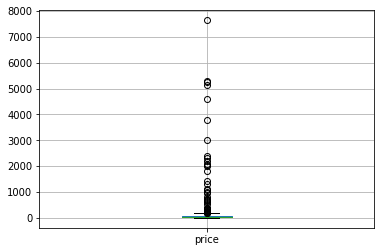

In [51]:
products_data.boxplot('price')

<AxesSubplot:ylabel='Frequency'>

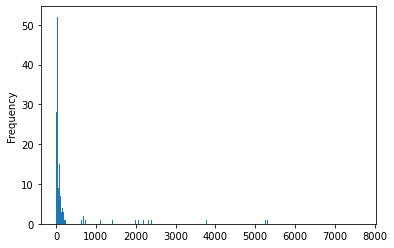

In [53]:
products_data['price'].plot.hist(bins = 1000)
# float_columns_names = data.select_dtypes("float").columns
# plt.rcParams['figure.figsize'][0] = 6.0
# plt.rcParams['figure.figsize'][1] = 4.0 * len(float_columns_names)
# figure, axes = plt.subplots(len(float_columns_names), 1)
# for i, column_name in enumerate(float_columns_names):
# #     print(train_data[column_name].value_counts())
#     data[column_name].plot.hist(ax = axes[i], alpha=0.5, title=column_name)

##### Oczyszczenie z produktów o cenie powyżej 500 złotych

In [54]:
clean_products = products_data[products_data.price<500]

In [56]:
teuer_products = products_data[products_data.price>=500]

In [57]:
teuer_products

,product_id,product_name,category_path,price
1,1002,Kyocera FS-1135MFP,Komputery;Drukarki i skanery;Biurowe urządzeni...,2048.50
2,1003,Kyocera FS-3640MFP,Komputery;Drukarki i skanery;Biurowe urządzeni...,7639.00
29,1030,LCD Iiyama B2280WSD,Komputery;Monitory;Monitory LCD,739.00
31,1032,LCD Iiyama E2280WSD,Komputery;Monitory;Monitory LCD,688.78
32,1033,LCD Iiyama T1932MSC,Komputery;Monitory;Monitory LCD,3029.00
33,1034,LCD NEC EA223WM,Komputery;Monitory;Monitory LCD,1079.00
34,1035,Samsung Galaxy S III GT-i9300,Telefony i akcesoria;Telefony komórkowe,2199.90
35,1036,LCD Asus VK228H,Komputery;Monitory;Monitory LCD,639.00
36,1037,LCD Asus VK248H,Komputery;Monitory;Monitory LCD,799.00
37,1038,LCD Asus VK278Q,Komputery;Monitory;Monitory LCD,1117.01


In [55]:
clean_products

,product_id,product_name,category_path,price
0,1001,Telefon Siemens Gigaset DA310,Telefony i akcesoria;Telefony stacjonarne,58.97
3,1004,Fallout 3 (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,49.99
4,1005,Szalone Króliki Na żywo i w kolorze (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,49.99
5,1006,Call of Duty 4 Modern Warfare (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,59.90
6,1007,Dead Space 3 (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,89.99
...,...,...,...,...
312,1313,Evolveo SHARK,Sprzęt RTV;Video;Telewizory i akcesoria;Anteny...,103.00
313,1314,Assassin&#39;s Creed (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,49.99
314,1315,Jabra Talk,Telefony i akcesoria;Akcesoria telefoniczne;Ze...,54.99
315,1316,Plantronics Voyager Legend,Telefony i akcesoria;Akcesoria telefoniczne;Ze...,249.00


<AxesSubplot:ylabel='Frequency'>

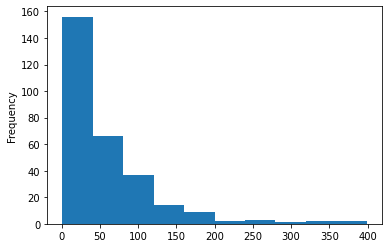

In [60]:
clean_products['price'].plot.hist(bins = 10)

<AxesSubplot:>

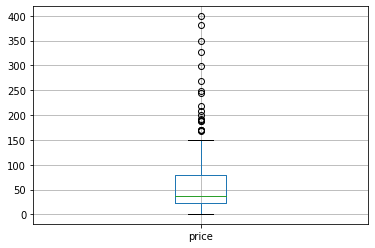

In [58]:
clean_products.boxplot('price')

array([<AxesSubplot:ylabel='category_path'>], dtype=object)

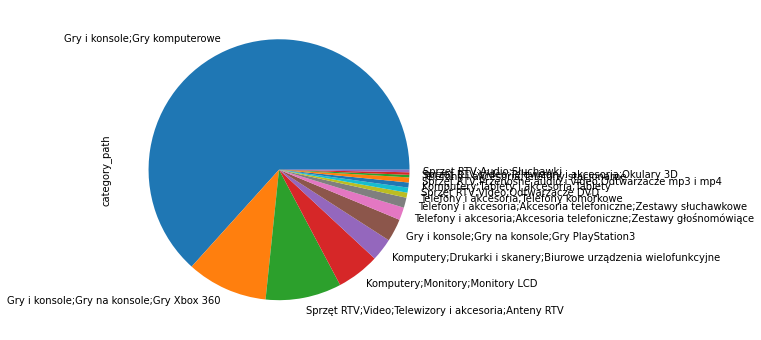

In [85]:
plt.rcParams['figure.figsize'][0] = 6.0
plt.rcParams['figure.figsize'][1] = 6.0
products_data['category_path'].value_counts().plot.pie(subplots=True)

# Dane o użytkownikach

In [77]:
users_data

,user_id,name,city,street
0,102,Arkadiusz Hejna,Wrocław,ul. Jana 32
1,103,Oskar Skotarczak,Warszawa,pl. Wrzosowa 595
2,104,Maksymilian Fik,Gdynia,al. Podwale 62
3,105,Fryderyk Hajdukiewicz,Gdynia,al. Narcyzowa 81/19
4,106,Marcelina Kinder,Wrocław,pl. Irysowa 472
...,...,...,...,...
195,297,Olga Myrcha,Kraków,plac Listopada 83/33
196,298,Nikodem Świgoń,Warszawa,ul. Złota 61/12
197,299,Gaja Wojtarowicz,Gdynia,ul. Baczynskiego 97
198,300,Inga Przewoźny,Radom,ulica Wysoka 33


In [80]:
users_data.dtypes

user_id     int64
name       object
city       object
street     object
dtype: object

In [81]:
pd.isna(users_data).sum()

user_id    0
name       0
city       0
street     0
dtype: int64

<AxesSubplot:ylabel='city'>

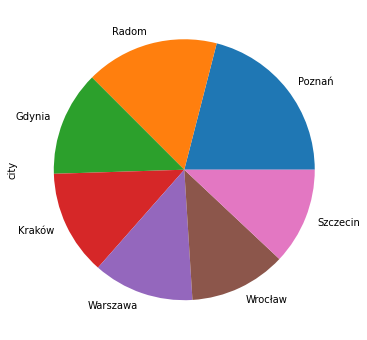

In [89]:
users_data['city'].value_counts().plot.pie()

In [95]:
users_data['street'].value_counts()

ul. Jana 32             1
pl. Olchowa 29/27       1
pl. Wąska 51/30         1
pl. Ludowa 108          1
al. Kraszewskiego 34    1
                       ..
plac Konwaliowa 424     1
plac Narutowicza 735    1
ulica Bankowa 29/30     1
plac Swierkowa 56       1
ulica Łanowa 88/93      1
Name: street, Length: 200, dtype: int64

# Dane dostaw

In [91]:
deliveries_data

,purchase_id,purchase_timestamp,delivery_timestamp,delivery_company
0,20001,2021-05-19T07:02:36,2021-05-21T07:04:43,360
1,20002,2021-02-27T20:13:02,2021-03-02T20:15:54,516
2,20003,2021-04-25T13:44:28,2021-04-29T13:45:25,620
3,20004,2021-09-12T10:03:56,2021-09-14T10:07:12,516
4,20005,2021-07-10T16:12:54,2021-07-15T16:16:25,516
...,...,...,...,...
3608,23609,2021-11-05T01:26:21,2021-11-07T01:31:12,620
3609,23610,2021-07-05T18:23:31,2021-07-07T18:27:35,516
3610,23611,2021-07-20T17:15:10,2021-07-23T17:17:26,516
3611,23612,2021-11-06T05:53:32,2021-11-10T05:54:08,620


In [96]:
deliveries_data.dtypes

purchase_id            int64
purchase_timestamp    object
delivery_timestamp    object
delivery_company       int64
dtype: object

In [93]:
pd.isna(deliveries_data).sum()

purchase_id           0
purchase_timestamp    0
delivery_timestamp    0
delivery_company      0
dtype: int64

<AxesSubplot:ylabel='delivery_company'>

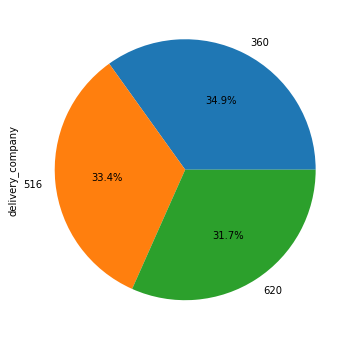

In [107]:
deliveries_data['delivery_company'].value_counts().plot.pie(autopct='%1.1f%%')

In [97]:
# float_columns_names = data.select_dtypes("float").columns
# # plt.rcParams['figure.figsize'][0] = 10.0
# plt.rcParams['figure.figsize'][1] = 10.0
# # figure, axes = plt.subplots(len(float_columns_names), 1)
# for i, column_name in enumerate(float_columns_names):
# #     print(train_data[column_name].value_counts())
#     data.plot.hexbin(x = 'price', y = column_name, gridsize = 20)

In [33]:
# object_columns_names = data.select_dtypes("object").columns
# for name in object_columns_names:
#     print(data[name].value_counts())

Telefon Siemens Gigaset DA310            1
Need for Speed Shift 2 Unleashed (PC)    1
LEGO Władca Pierścieni (PC)              1
Hitman Krwawa Forsa (PC)                 1
Damnation (PC)                           1
                                        ..
Overlord (PC)                            1
Battlefield 3 Close Quarters (PC)        1
Anomaly Warzone Earth (PC)               1
Symulator Śmieciarki (PC)                1
HTC HS-S200                              1
Name: product_name, Length: 319, dtype: int64
Gry i konsole;Gry komputerowe                                        202
Gry i konsole;Gry na konsole;Gry Xbox 360                             32
Sprzęt RTV;Video;Telewizory i akcesoria;Anteny RTV                    30
Komputery;Monitory;Monitory LCD                                       17
Komputery;Drukarki i skanery;Biurowe urządzenia wielofunkcyjne         9
Gry i konsole;Gry na konsole;Gry PlayStation3                          9
Telefony i akcesoria;Akcesoria telefoniczne

# Pytania
- w jakiej formie będziemy dostawać dane na produkcji